# Proyek Analisis Data: Bike Sharing
- **Nama:** Darmawan Setyaputra Purba
- **Email:** dsputra1202@gmail.com
- **ID Dicoding:** Darmawan Putra

## Menentukan Pertanyaan Bisnis

- Bagaimana tingkat peminjaman sepeda pada tahun 2011 dan 2012?
- Pada bulan apa jumlah peminjaman sepeda terbesar berhasil dicapai untuk setiap tahunya?
- Apakah keadaan cuaca dan kondisi alam mempengaruhi jumlah peminjaman sepeda pada setiap harinya?
- Dalam satu hari, pada jam berapa peminjaman sepeda banyak terjadi?
- Tipe pelanggan yang seperti apa yang mendominasi penggunaan layanan peminjaman sepeda di hari kerja?

## Import Semua Packages/Library yang Digunakan

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [14]:
hour_df = pd.read_csv("hour.csv")
day_df = pd.read_csv("day.csv")

hour_df.head()
day_df.head()

hour_df.describe()
day_df.describe()

hour_df = pd.read_csv("hour.csv")
day_df = pd.read_csv("day.csv")

**Insight:**
- Membaca data perhitungan peminjaman sepeda yang diakumulasikan berdasarkan jam, yaitu data hour_csv
- Membaca data perhitungan peminjaman sepeda yang diakumulasikan berdasarkan hari, yaitu data day_csv
- Kedua data tersebut identik dan memiliki kolom yang yang sama, dan hanya terdapat perbedaan pada day_csv, yang tidak mengandung kolom hr

### Assessing Data

In [15]:
hour_df.info()
day_df.info()

hour_kosong = hour_df.isna().sum()
print(hour_kosong)

day_kosong = day_df.isna().sum()
print(day_kosong)

hour_kosong = hour_df.duplicated().sum()
print(hour_kosong)

day_kosong = day_df.duplicated().sum()
print(day_kosong)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

**Insight:**
- Tidak ditemukan data yang kosong maupun data yang duplikat pada dataframe hour_csv
- Tidak ditemukan data yang kosong maupun data yang duplikat pada dataframe day_csv
- Pada kedua data frama, yaitu hour_df dan day_df, keduanya direpresentasikan dengan tipe data yang kurang tepat, yaitu object, yang merupakan tipe data string, sehingga perlu dibersihkan di tahap cleaning

### Cleaning Data

In [16]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

**Insight:**
- Tipe data untuk kolom dteday pada dataframe hour_df telah diperbaiki menjadi datetime
- Tipe data untuk kolom dteday pada dataframe day_df telah diperbaiki menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
#Pertanyaan 1
yearly_stats = day_df.groupby(by="yr").agg({
    "cnt" : ["sum", "max", "min", "mean", "std"]
})
print(yearly_stats)

# #Pertanyaan 2
day0_df = day_df[day_df['yr'] == 0]
day1_df = day_df[day_df['yr'] == 1]

monthly_stats0 = day0_df.groupby(["mnth", "yr"]).agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

monthly0_stats_sorted = monthly_stats0.sort_values(by=("cnt", "sum"), ascending=False)
monthly0_stats_sorted.reset_index(inplace=True)
print(monthly0_stats_sorted)

monthly_stats1 = day1_df.groupby(["mnth", "yr"]).agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

monthly1_stats_sorted = monthly_stats1.sort_values(by=("cnt", "sum"), ascending=False)
monthly1_stats_sorted.reset_index(inplace=True)
print(monthly1_stats_sorted)

# Pertanyaan 3
day_df.groupby(by="weathersit").agg({
    "cnt": ["sum", "max", "min", "mean", "std"]
})

weather_corr = day_df[['weathersit', 'cnt']].corr()
print(weather_corr)

nature_corr = day_df[['cnt', 'temp', 'hum', 'windspeed']].corr()
print(nature_corr)

#Pertanyaan 4
hourly_stats = hour_df.groupby(by="hr").agg({
    'cnt' : ["sum", "max", "min", "mean", "std"]
})

#Pertanyaan 5
print(hourly_stats)
hourly_stats_sorted = hourly_stats.sort_values(by=("cnt", "sum"), ascending=False)
hourly_stats_sorted.reset_index(inplace=True)
print(hourly_stats_sorted)

#Pertanyaan 5
day_df.groupby(by="workingday").agg({
    'casual' : ["sum", "mean"],
    'registered': ["sum", "mean"]
})

        cnt                                     
        sum   max  min         mean          std
yr                                              
0   1243103  6043  431  3405.761644  1378.753666
1   2049576  8714   22  5599.934426  1788.667868
   mnth yr     cnt                                      
               sum   max   min         mean          std
0     6  0  143512  5515  3767  4783.733333   444.447812
1     7  0  141341  6043  3285  4559.387097   680.090762
2     8  0  136691  5895  1115  4409.387097   809.852401
3     5  0  135821  5805  2633  4381.322581   572.927883
4     9  0  127418  5423  1842  4247.266667   965.377251
5    10  0  123511  5511   627  3984.225806  1103.481844
6    11  0  102167  4486  1495  3405.566667   788.249290
7     4  0   94870  5312   795  3162.333333  1042.093593
8    12  0   87323  3940   705  2816.870968   958.763187
9     3  0   64045  3239   605  2065.967742   550.971716
10    2  0   48215  2927  1005  1721.964286   398.508839
11    1  0   3

casual              registered             
               sum         mean        sum         mean
workingday                                             
0           316732  1371.134199     683537  2959.034632
1           303285   606.570000    1989125  3978.250000

**Insight:**
- Berdasarkan hasil analisis pada dataframe day_df, dapat kita lihat bahwa dari tahun 2011 ke tahun 2012, terdapat peningkatan jumlah peminjaman sepeda
- Berdasarkan hasil analisis pada dataframe day_df, jumlah peminjaman sepeda terbanyak untuk setiap tahunnya berada pada periode bulan Mei hingga bulan September
- Kondisi cuaca yang meningkat tidak memiliki dampak yang cukup signifikan dalam menurunkan jumlah peminjaman sepeda. Di antara 4 faktor alam lainnya, adanya peningkatan suhu lingkungan memiliki dampak yang cukup signfikan dalam meningkatkan jumlah peminjaman sepeda
- Jumlah peminjaman sepeda terbanyak ada di pukul 17.00
- Dengan melakukan group by berdasarkan hari kerja, dapat ditemukan bahwa penggunanaan layananan jasa peminjaman sepeda di hari kerja maupun non haru kerja cukup identik bagi pengguna biasa. Namun, bagi pengguna yang berlangganan, penggunaan layanan peminjaman sepeda jauh lebih banyak di hari non kerja

## Visualization & Explanatory Analysis

### Pertanyaan 1:

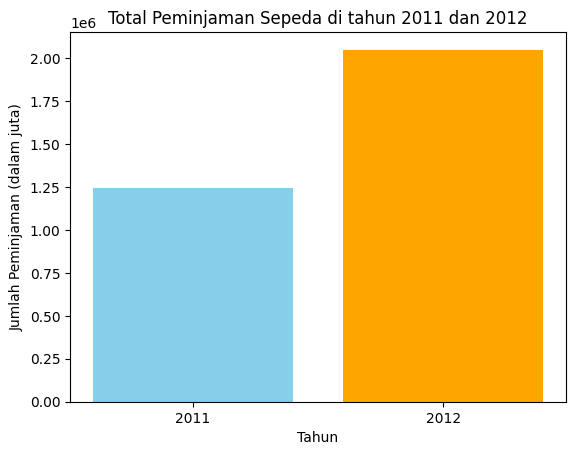

In [21]:
total_0 = day0_df['cnt'].sum() 
total_1 = day1_df['cnt'].sum()  

tahun = [0, 1] 
total = [total_0, total_1]  

plt.bar(x=tahun, height=total, color=['skyblue', 'orange'])
plt.xticks(ticks=[0, 1], labels=['2011', '2012']) 
plt.xlabel('Tahun')
plt.ylabel('Jumlah Peminjaman (dalam juta)')
plt.title('Total Peminjaman Sepeda di tahun 2011 dan 2012')
plt.show()

### Pertanyaan 2:

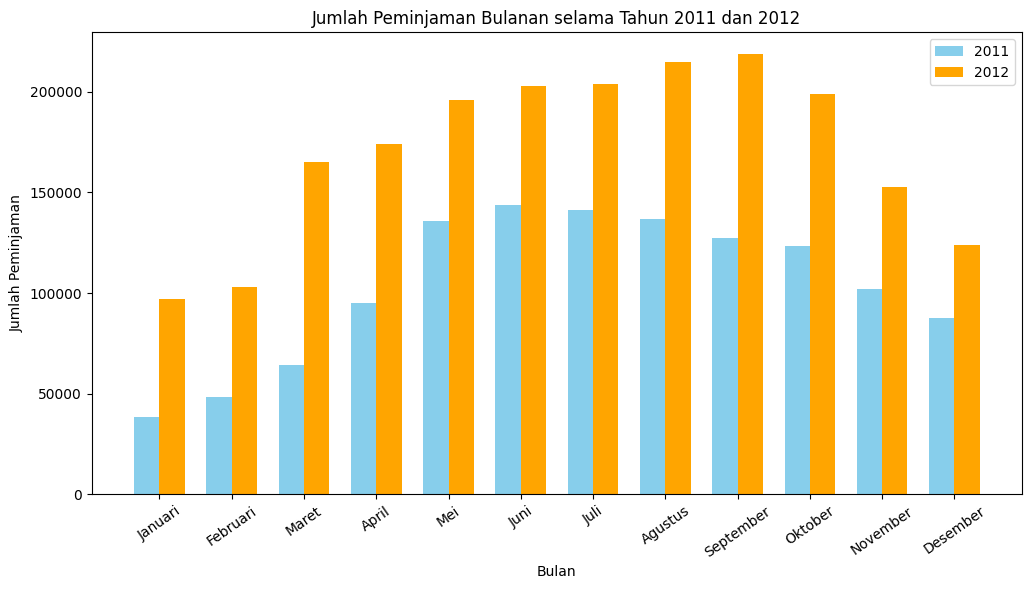

In [22]:
month_names = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
}

months_2011 = monthly_stats0.index.get_level_values('mnth')
rentals_2011 = monthly_stats0[('cnt', 'sum')]

months_2012 = monthly_stats1.index.get_level_values('mnth')
rentals_2012 = monthly_stats1[('cnt', 'sum')]

month_labels_2011 = [month_names[mnth] for mnth in months_2011]
month_labels_2012 = [month_names[mnth] for mnth in months_2012]

bar_width = 0.35  
x1 = range(len(months_2011))  
x2 = [pos + bar_width for pos in x1]  

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x1, rentals_2011, width=bar_width, label='2011', color='skyblue')

ax.bar(x2, rentals_2012, width=bar_width, label='2012', color='orange')

ax.set_xlabel('Bulan')
ax.set_ylabel('Jumlah Peminjaman')
ax.set_title('Jumlah Peminjaman Bulanan selama Tahun 2011 dan 2012')
ax.set_xticks([r + bar_width / 2 for r in x1])  
ax.set_xticklabels(month_labels_2011)  

ax.legend()

plt.xticks(rotation = 35)
plt.show()

### Pertanyaan 3:

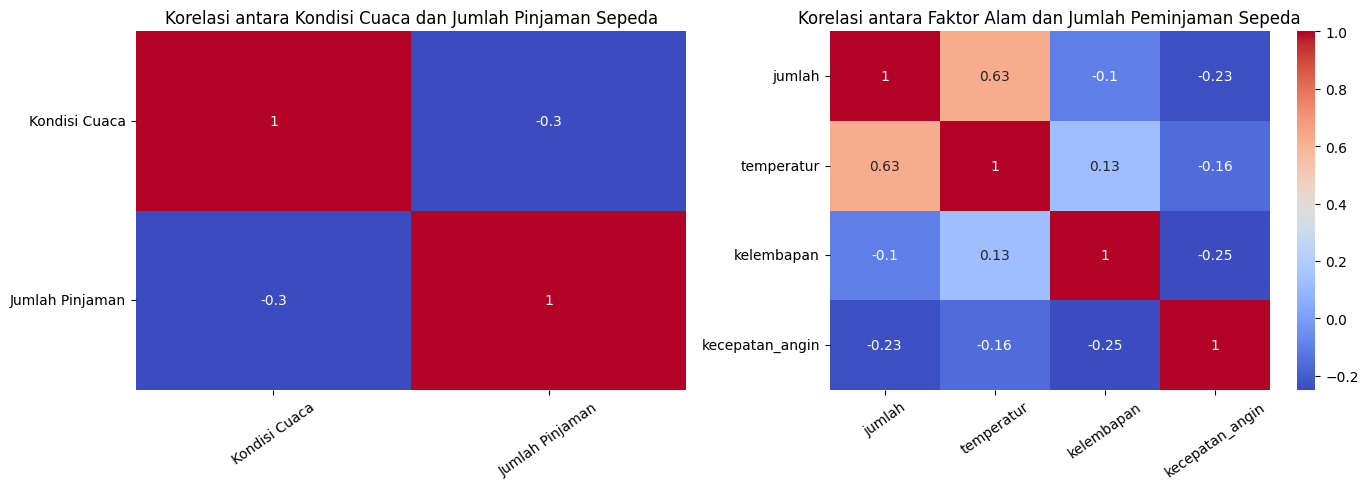

In [23]:
revised_day_df = day_df.rename(columns={'cnt': 'jumlah', 'temp': 'temperatur', 'hum': 'kelembapan',  'windspeed': 'kecepatan_angin'}, inplace=False)

weather_corr = revised_day_df[['weathersit', 'jumlah']].corr()
nature_corr = revised_day_df[['jumlah', 'temperatur', 'kelembapan', 'kecepatan_angin']].corr()

fig, ax = plt.subplots(1, 2, figsize=(14, 5))  

sns.heatmap(weather_corr, annot=True, cmap='coolwarm', ax=ax[0], cbar=False)
ax[0].set_title('Korelasi antara Kondisi Cuaca dan Jumlah Pinjaman Sepeda')
ax[0].set_xticklabels(['Kondisi Cuaca', 'Jumlah Pinjaman'], rotation=35)
ax[0].set_yticklabels(['Kondisi Cuaca', 'Jumlah Pinjaman'], rotation=0)

sns.heatmap(nature_corr, annot=True, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Korelasi antara Faktor Alam dan Jumlah Peminjaman Sepeda')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=35)
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

### Pertanyaan 4:

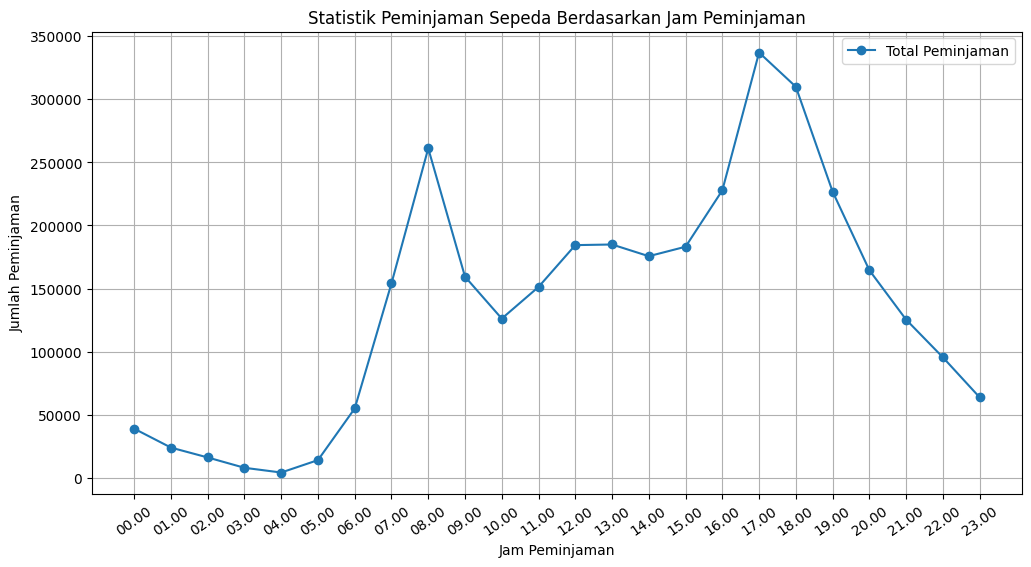

In [24]:
hourly_stats = hour_df.groupby(by="hr").agg({
    'cnt' : ["sum", "max", "min", "mean", "std"]
})

hours = hourly_stats.index
total_rentals = hourly_stats[('cnt', 'sum')]

hour_labels = ['00.00', '01.00', '02.00', '03.00', '04.00', '05.00', '06.00', 
               '07.00', '08.00', '09.00', '10.00', '11.00', '12.00', 
               '13.00', '14.00', '15.00', '16.00', '17.00', '18.00', 
               '19.00', '20.00', '21.00', '22.00', '23.00']

plt.figure(figsize=(12, 6))
plt.plot(hours, total_rentals, label='Total Peminjaman', marker='o')

plt.xlabel('Jam Peminjaman')
plt.ylabel('Jumlah Peminjaman')
plt.title('Statistik Peminjaman Sepeda Berdasarkan Jam Peminjaman')
plt.xticks(ticks=hours, labels=hour_labels, rotation = 35)
plt.grid(visible=True) 
plt.legend()

plt.show()

### Pertanyaan 5:

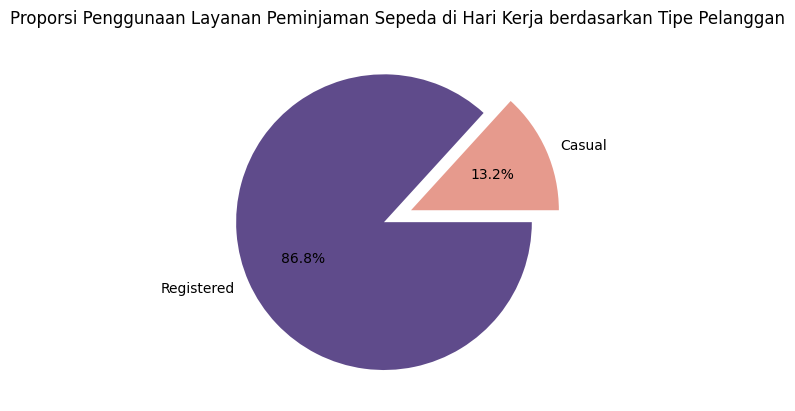

In [25]:
working_day_df = day_df[day_df['workingday'] == True]
total_casual = working_day_df['casual'].sum()
total_registered = working_day_df['registered'].sum()

tipe_peminjam = ('Casual', 'Registered')
total = (total_casual, total_registered)
colors = ('#E69A8DFF', '#5F4B8BFF')
explode = (0.1, 0.1)

plt.pie(
    x=total,
    labels=tipe_peminjam,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)

plt.title("Proporsi Penggunaan Layanan Peminjaman Sepeda di Hari Kerja berdasarkan Tipe Pelanggan")
plt.show()

**Insight:**
- Melalui visualisasi Bar Graph, ditemukan fakta bahwa jumlah peminjaman sepeda mengalami peningkatan yang cukup signifikan dari tahun 2011 ke tahun 2012, yaitu sekitar 750000 peminjam
- Melalui visualisasi Multiple Bar Graph, pada tahun 2011 dan 2012, jumlah peminjaman sepeda konsisten untuk meningkat setiap bulannya hingga pertengahan tahun. Namun, pada bulan Juli 2011, jumlah peminjaman sepeda turun sedikit demi sedikit hingga akhir tahun, sedangkan pada tahun 2012, jumlah peminjaman sepeda masih meningkat dari awal tahun hingga bulan september, lalu menurun hingga akhir tahun
- Melalui visualisasi Heatmap, kondisi cuaca yang meningkat mempengaruhi penurunan jumlah peminjaman sepeda, tetapi tidak cukup signifikan untuk mampu menurunkan jumlah peminjaman sepeda. Dari 4 faktor alam yang diamati, faktor temperatur (suhu) merupakan salah faktor alam  yang
memiliki pengaruh kuat terhadap jumlah peminjamaan sepeda, dimana semakin tinggi suhu lingkungan, maka jumlah peminjaman sepeda juga akan meningkat
- Melalui visualisasi Line Chart, pemakaian jasa peminjaman sepeda terbanyak berada pada pukul 17.00
- Melalui visualisasi Pie Chart, ditemukan fakta bahwa dari data harian peminjaman sepeda, layanan peminjaman sepeda banyak digunakan di hari kerja oleh pengguna yang berlangganan dibandingkan pengguna biasa

## Analisis Lanjutan (Clustering)

In [ ]:
data = hour_df[['cnt', 'casual', 'registered', 'hr', 'weekday']]

hour_labels = ['00.00', '01.00', '02.00', '03.00', '04.00', '05.00', '06.00', 
               '07.00', '08.00', '09.00', '10.00', '11.00', '12.00', 
               '13.00', '14.00', '15.00', '16.00', '17.00', '18.00', 
               '19.00', '20.00', '21.00', '22.00', '23.00']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=42)
hour_df['Cluster'] = kmeans.fit_predict(data_scaled)

cluster_by_hour = hour_df[['hr', 'Cluster']]

plt.figure(figsize=(12, 6))
sns.countplot(data=cluster_by_hour, x='hr', hue='Cluster', palette='Set2')
plt.title("Distribusi Cluster  Tipe Pelanggan berdasarkan Jam Peminjaman menggunakan KMeans")
plt.xlabel("Jam Peminjaman")
plt.ylabel("Banyaknya Peminjaman")
plt.legend(title="Cluster", labels=['Casual (Cluster 0)', 'Commuter (Cluster 1)', 'Commuter dan Casual (Cluster 2)'])
plt.xticks(ticks=range(len(hour_labels)), labels=hour_labels, rotation = 35)
plt.tight_layout()  
plt.show()

**Insight**
Melalui Analisis Tambahan menggunakan metode Clustering, kita dapat mengidentifikasi karakteristik  pelanggan berdasarkan persebaran kluster di masing-masing jam dalam satu hari. Melalui Clustering yang dengan membagi data menjadi 3 Cluster, kita dapat melihat 3 karakteristik utama pengguna layanan peminjaman sepeda, yaitu tipe commuter, yang banyak menggunakan layanan di pagi hingga siang hari, casual user yang menggunakan layanan dari pagi hingga malam hari dengan jumlah yang lebih sedikit, dan tipe hybrid, yaitu casual dan commuter, yang menggunakan layanan peminjaman sepeda dari pagi hingga larut malam

## Conclusion

- Tingkat peminjaman sepeda di tahun 2012 mengalami peningkatan dibandingkan dengan tahun 2011 
- Peminjaman sepeda  di tahun 2011 meningkat secara konsisten dari awal tahun dan berpuncak di bulan Juni, sedangkan pada tahun 2012, peminjaman secara konsisten meningkat dari awal tahun dan berpuncak di bulan September
- Keadaan cuaca tidak memiliki dampak yang signifikan terhadap penggunaan layanan peminjaman sepeda, tetapi salah satu faktor alam, yaitu suhu lingkungan, memiliki dampak yang tinggi terhadap peningkatan jumlah peminjaman layanan sepeda
- Peminjaman sepeda banyak terjadi di jam 17.00
- Pelanggaan yang berlangganan di layanan sepeda mendominasi penggunaan layanan peminjaman sepeda dibandingkan pengguna biasa
- Melalui analisis tambahan, dapat diidentifikasi karakteristik pelanggan berdasarkan jam peminjaman yang dilakukan, yaitu tipe commuter, casual, maupun keduanya 